# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


# Section 1: Loading and Displaying Data, and Initial Model Training

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

#### 1.1 Loading the Data

In [2]:
# Loading the dataset
train_data = pd.read_csv('./data/sign_mnist_train.csv')
test_data = pd.read_csv('./data/sign_mnist_test.csv')

# Displaying the first few rows of the training data to understand its structure
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179


In [3]:
# Displaying the first few rows of the testing data to understand its structure
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,6,149,149,150,150,150,151,151,151,151,...,148,148,127,112,120,120,120,120,120,107
1,5,126,128,131,132,133,134,135,135,136,...,194,194,194,186,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,242,242,242,230,230,227,226,225,224,222
3,0,203,205,207,207,207,209,210,210,210,...,253,253,253,253,253,255,255,255,255,255
4,3,188,191,193,195,199,201,202,203,203,...,64,64,64,49,49,53,53,53,53,53


#### 1.2 Data Inspection

In [4]:
# Inspecting the structure of the dataset
print("Training Data Info:")
print(train_data.shape)
print("\nTest Data Info:")
print(test_data.shape)

# Checking for missing values
print("\nChecking for missing values in the training data:")
print(train_data.isnull().sum().sum())

print("\nChecking for missing values in the test data:")
print(test_data.isnull().sum().sum())

 

Training Data Info:
(27455, 1025)

Test Data Info:
(7172, 1025)

Checking for missing values in the training data:
0

Checking for missing values in the test data:
0


#### 1.3 Examining class balance

This is to ensure that we are dealing with balanced classes to avoid potential bias and misleading performance metrics.

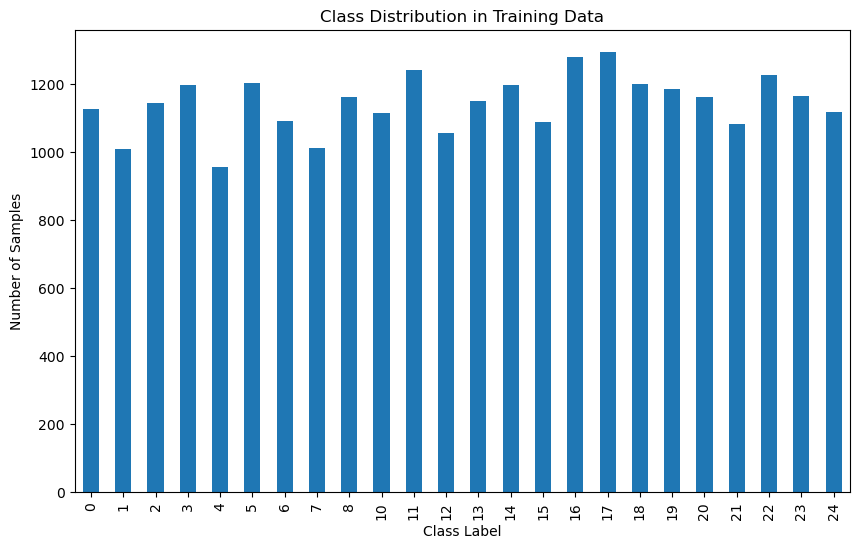

**Class Distribution in Training Data:**

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

In [5]:
# Examining the distribution of classes in the training data
class_distribution = train_data['label'].value_counts().sort_index()

# Plotting the class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

# Displaying the exact distribution
display(Markdown("**Class Distribution in Training Data:**"))
display(class_distribution)


The bar plot shows a roughly even distribution in training data with some minor deviations where certain classes have slightly fewer or more samples than others. This shows a class balance in the data.

#### 1.4 Displaying a Sample of Each Letter

To verify that our data is correctly loaded, we'll visualise a sample of each letter in the dataset.

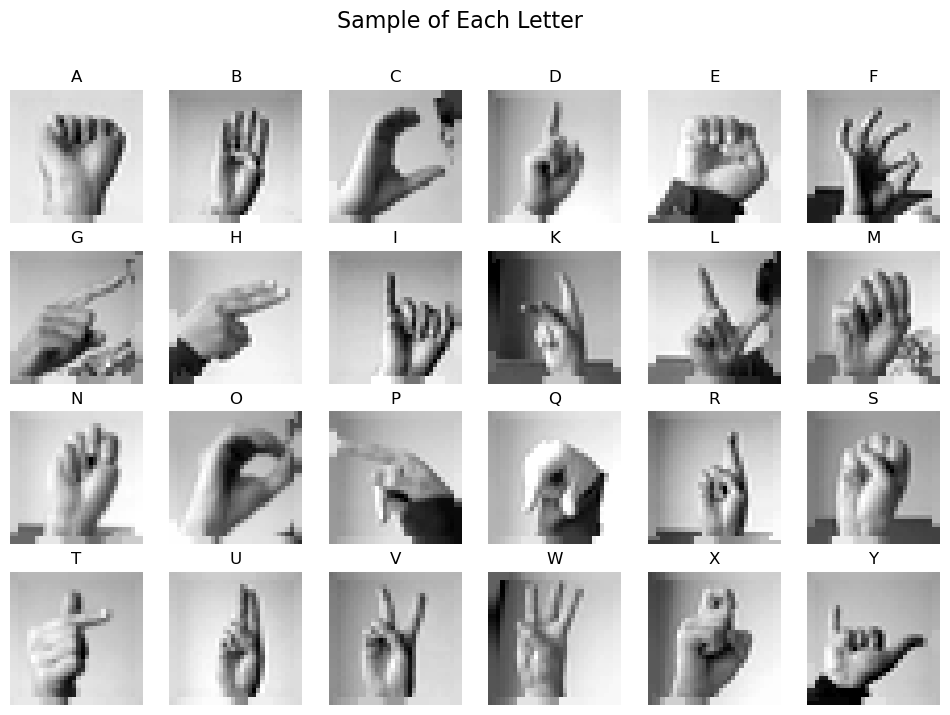

In [6]:
# Defining a function to display a sample of each letter
def plot_samples_per_letter(data):
    fig, axes = plt.subplots(4, 6, figsize=(12, 8))
    fig.suptitle('Sample of Each Letter', fontsize=16)
    
    labels = data['label'].unique()
    for i, label in enumerate(sorted(labels)):
        ax = axes[i // 6, i % 6]
        sample = data[data['label'] == label].iloc[0, 1:].values
        sample_image = sample.reshape(32, 32)  # Reshaping the flattened image
        ax.imshow(sample_image, cmap='gray')
        ax.set_title(chr(label + 65))  # Converting label to corresponding letter
        ax.axis('off')
    
    plt.show()

# Calling the function to plot samples
plot_samples_per_letter(train_data)


#### 1.5 Baseline Model Training

Now, we’ll proceed to build a simple baseline model, such as a densely connected neural network. We will train this model and record its performance as a baseline.

In [7]:
import tensorflow as tf
import numpy as np
import random

# Setting random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Determining the correct number of classes
num_classes = train_data['label'].max() + 1  

# Preparing the data for the model
X_train = train_data.iloc[:, 1:].values.reshape(-1, 32, 32, 1)  # Adjusting reshape for the correct image size
y_train = to_categorical(train_data['label'].values, num_classes=num_classes)

X_test = test_data.iloc[:, 1:].values.reshape(-1, 32, 32, 1)
y_test = to_categorical(test_data['label'].values, num_classes=num_classes)

# Normalising the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# Building a simple baseline model
baseline_model = Sequential([
    Flatten(input_shape=(32, 32, 1)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compiling the model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = baseline_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=2)

# Evaluating the model on the test data
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2f}')

baseline_model.summary()

Epoch 1/10


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


773/773 - 2s - 3ms/step - accuracy: 0.2326 - loss: 2.4864 - val_accuracy: 0.3714 - val_loss: 1.8426
Epoch 2/10
773/773 - 1s - 2ms/step - accuracy: 0.4625 - loss: 1.6424 - val_accuracy: 0.4978 - val_loss: 1.4597
Epoch 3/10
773/773 - 1s - 1ms/step - accuracy: 0.5662 - loss: 1.3413 - val_accuracy: 0.5903 - val_loss: 1.2094
Epoch 4/10
773/773 - 1s - 2ms/step - accuracy: 0.6300 - loss: 1.1476 - val_accuracy: 0.6471 - val_loss: 1.0412
Epoch 5/10
773/773 - 1s - 1ms/step - accuracy: 0.6782 - loss: 1.0007 - val_accuracy: 0.6926 - val_loss: 0.9220
Epoch 6/10
773/773 - 1s - 2ms/step - accuracy: 0.7162 - loss: 0.8812 - val_accuracy: 0.7192 - val_loss: 0.8130
Epoch 7/10
773/773 - 1s - 2ms/step - accuracy: 0.7486 - loss: 0.7812 - val_accuracy: 0.7458 - val_loss: 0.7416
Epoch 8/10
773/773 - 1s - 2ms/step - accuracy: 0.7772 - loss: 0.6931 - val_accuracy: 0.7709 - val_loss: 0.6784
Epoch 9/10
773/773 - 1s - 2ms/step - accuracy: 0.8000 - loss: 0.6165 - val_accuracy: 0.7906 - val_loss: 0.6222
Epoch 10/10


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,517 (802.80 KB)

 Trainable params: 68,505 (267.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,012 (535.21 KB)

**Comments:** The baseline model is quite simple, with a low parameter count and corresponding lower accuracy. It's a good starting point but not competitive in terms of accuracy.

#### 1.6 CNN  Model Training

In [10]:
from keras.layers import Conv2D, MaxPooling2D

cnn_model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn = cnn_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=2)

# validation_split ensures 10% of the training data will be set aside for validation during training process.

# Evaluating the model on the test data
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy (CNN): {test_accuracy_cnn:.2f}')

# Summarising the model to count parameters
cnn_model.summary()


Epoch 1/10


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


773/773 - 4s - 5ms/step - accuracy: 0.6249 - loss: 1.2745 - val_accuracy: 0.8980 - val_loss: 0.3500
Epoch 2/10
773/773 - 5s - 6ms/step - accuracy: 0.9594 - loss: 0.1612 - val_accuracy: 0.9898 - val_loss: 0.0540
Epoch 3/10
773/773 - 5s - 7ms/step - accuracy: 0.9976 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/10
773/773 - 5s - 7ms/step - accuracy: 0.9998 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/10
773/773 - 5s - 7ms/step - accuracy: 0.9932 - loss: 0.0236 - val_accuracy: 0.9985 - val_loss: 0.0106
Epoch 6/10
773/773 - 3s - 4ms/step - accuracy: 0.9996 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/10
773/773 - 5s - 7ms/step - accuracy: 1.0000 - loss: 8.0533e-04 - val_accuracy: 1.0000 - val_loss: 6.0936e-04
Epoch 8/10
773/773 - 5s - 7ms/step - accuracy: 1.0000 - loss: 5.0652e-04 - val_accuracy: 1.0000 - val_loss: 4.2179e-04
Epoch 9/10
773/773 - 3s - 4ms/step - accuracy: 1.0000 - loss: 3.4306e-04 - val_accuracy: 1.0000 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,653 (940.05 KB)

 Trainable params: 80,217 (313.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,436 (626.71 KB)

**Comments:** The CNN model significantly improves accuracy while keeping the parameter count well below the 500,000 limit. It shows the effectiveness of CNNs for image-based tasks.

# Section 2: Model Optimization

Now that we have our baseline model, let's proceed with optimising the models. The goal is to explore different architectures and optimise them within the constraints of 500,000 parameters and 50 training runs.

#### 2.1 Exploring Densely Connected Networks
We'll start by exploring some variations of densely connected networks. We'll modify the number of layers and the number of units per layer to see how it affects the performance while staying within the parameter limits.

In [11]:
# Densely Connected Network with more layers
dense_model_v2 = Sequential([
    Flatten(input_shape=(32, 32, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
dense_model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dense_v2 = dense_model_v2.fit(X_train, y_train, validation_split=0.1, 
                                      epochs=10, batch_size=32, verbose=2)

# Evaluate the model on the test data
test_loss_dense_v2, test_accuracy_dense_v2 = dense_model_v2.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy (Dense): {test_accuracy_dense_v2:.2f}')

# Summarize the model to count parameters
dense_model_v2.summary()


Epoch 1/10
773/773 - 2s - 3ms/step - accuracy: 0.3273 - loss: 2.1573 - val_accuracy: 0.4734 - val_loss: 1.5209
Epoch 2/10
773/773 - 1s - 2ms/step - accuracy: 0.6084 - loss: 1.2076 - val_accuracy: 0.6511 - val_loss: 1.0523
Epoch 3/10
773/773 - 3s - 3ms/step - accuracy: 0.7220 - loss: 0.8620 - val_accuracy: 0.7338 - val_loss: 0.7929
Epoch 4/10
773/773 - 1s - 2ms/step - accuracy: 0.7885 - loss: 0.6594 - val_accuracy: 0.8015 - val_loss: 0.6009
Epoch 5/10
773/773 - 1s - 2ms/step - accuracy: 0.8359 - loss: 0.5166 - val_accuracy: 0.8438 - val_loss: 0.4590
Epoch 6/10
773/773 - 1s - 2ms/step - accuracy: 0.8715 - loss: 0.4032 - val_accuracy: 0.8842 - val_loss: 0.3544
Epoch 7/10
773/773 - 1s - 2ms/step - accuracy: 0.9010 - loss: 0.3161 - val_accuracy: 0.9199 - val_loss: 0.2756
Epoch 8/10
773/773 - 3s - 3ms/step - accuracy: 0.9205 - loss: 0.2543 - val_accuracy: 0.9403 - val_loss: 0.2109
Epoch 9/10
773/773 - 3s - 3ms/step - accuracy: 0.9408 - loss: 0.1936 - val_accuracy: 0.9494 - val_loss: 0.1749
E

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 25)                  │           1,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,245 (1.61 MB)

 Trainable params: 141,081 (551.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 282,164 (1.08 MB)

**Comments:** With increased number of layers the densely connected network has a higher parameter count but only marginally better accuracy than the baseline. It is still under the 500,000 parameter limit, but the improvement in accuracy does not justify the increase in parameters compared to the CNN models.

#### 2.2 Exploring Convolutional Neural Networks (CNNs)

Next, we’ll explore CNN architectures with additional convolutional layers.

In [12]:
# CNN with additional convolutional layers

cnn_model_v2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2 = cnn_model_v2.fit(X_train, y_train, validation_split=0.1, 
                                  epochs=10, batch_size=32, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2, test_accuracy_cnn_v2 = cnn_model_v2.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy (CNN v2): {test_accuracy_cnn_v2:.2f}')

# Summarising the model to count parameters
cnn_model_v2.summary()


Epoch 1/10
773/773 - 8s - 10ms/step - accuracy: 0.6792 - loss: 1.0538 - val_accuracy: 0.9468 - val_loss: 0.1610
Epoch 2/10
773/773 - 6s - 8ms/step - accuracy: 0.9873 - loss: 0.0530 - val_accuracy: 0.9851 - val_loss: 0.0521
Epoch 3/10
773/773 - 10s - 13ms/step - accuracy: 0.9975 - loss: 0.0131 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/10
773/773 - 10s - 13ms/step - accuracy: 1.0000 - loss: 8.1863e-04 - val_accuracy: 1.0000 - val_loss: 4.9639e-04
Epoch 5/10
773/773 - 11s - 14ms/step - accuracy: 1.0000 - loss: 3.8916e-04 - val_accuracy: 1.0000 - val_loss: 2.7795e-04
Epoch 6/10
773/773 - 6s - 8ms/step - accuracy: 1.0000 - loss: 2.1858e-04 - val_accuracy: 1.0000 - val_loss: 1.5994e-04
Epoch 7/10
773/773 - 10s - 13ms/step - accuracy: 1.0000 - loss: 1.2648e-04 - val_accuracy: 1.0000 - val_loss: 9.6285e-05
Epoch 8/10
773/773 - 10s - 13ms/step - accuracy: 1.0000 - loss: 7.8254e-05 - val_accuracy: 1.0000 - val_loss: 6.3270e-05
Epoch 9/10
773/773 - 7s - 8ms/step - accuracy: 1.0000 - loss:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Comments:** The CNN v2 model achieves the highest accuracy while staying just under the 500,000 parameter limit. This makes it the most effective model in terms of balancing performance with parameter constraints.

##### Visualising the training and validation accuracy over epochs

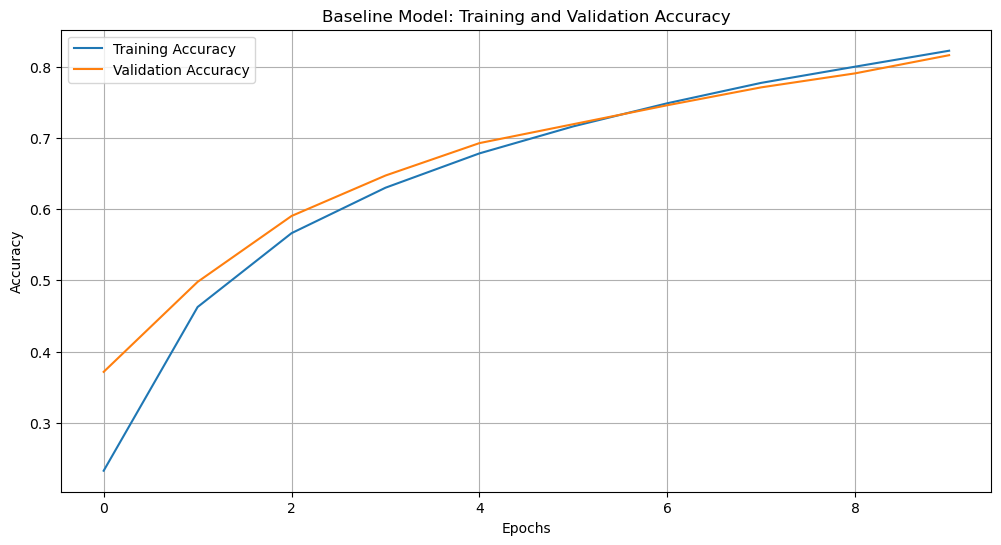

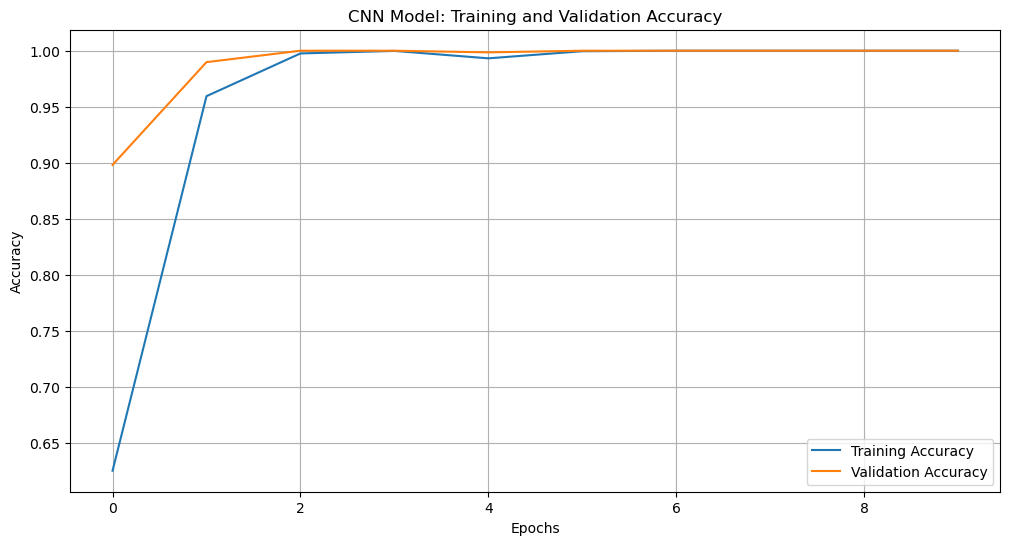

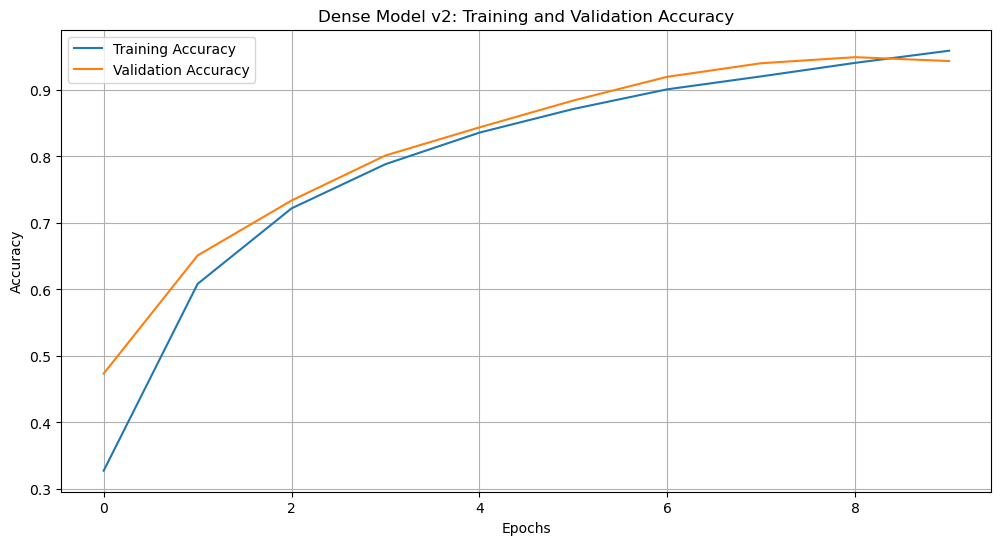

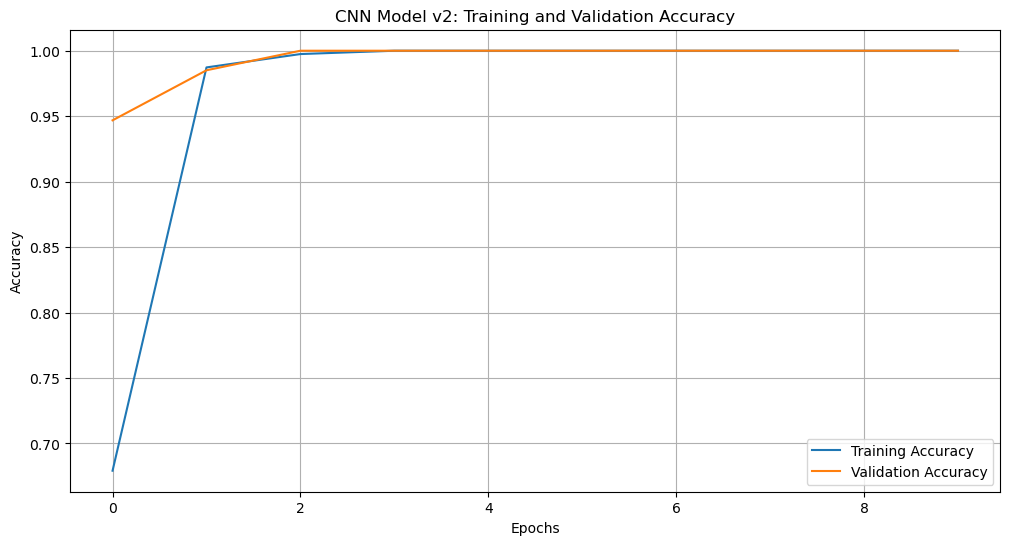

In [13]:
# Function to plot learning curves
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ploting learning curves for each model

# 1.3 Baseline Model Training
plot_learning_curves(history, 'Baseline Model: Training and Validation Accuracy')

# 1.4 CNN Model Training
plot_learning_curves(history_cnn, 'CNN Model: Training and Validation Accuracy')

# 2.1 Exploring Densely Connected Networks
plot_learning_curves(history_dense_v2, 'Dense Model v2: Training and Validation Accuracy')

# 2.2 Exploring Convolutional Neural Networks (CNNs)
plot_learning_curves(history_cnn_v2, 'CNN Model v2: Training and Validation Accuracy')


**Conclusion and Recommendation:** The CNN v2 model from Section 2.2 is the clear winner, with the highest accuracy (0.93) and a parameter count that remains within the 500,000 limit. 

#### 2.3 Refine the Best Candidate Model (CNN v2)

Since the CNN v2 model has shown the best performance so far, we will use a few of the remaining training runs to fine-tune this model.

**2.3.1** Adjusting Learning Rate to 0.0001

In [14]:
# Adjusting learning rate and re-training CNN v2 model
from keras.optimizers import Adam

# Adjust learning rate
cnn_model_v2_tuned = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model with a modified learning rate
cnn_model_v2_tuned.compile(optimizer=Adam(learning_rate=0.0001), 
                           loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2_tuned = cnn_model_v2_tuned.fit(X_train, y_train, validation_split=0.1, 
                                              epochs=10, batch_size=32, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_tuned, test_accuracy_cnn_v2_tuned = cnn_model_v2_tuned.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (Tuned CNN v2): {test_accuracy_cnn_v2_tuned:.2f}')

# Summarising the model to count parameters
cnn_model_v2_tuned.summary()


Epoch 1/10
773/773 - 8s - 10ms/step - accuracy: 0.3001 - loss: 2.4312 - val_accuracy: 0.5899 - val_loss: 1.3935
Epoch 2/10
773/773 - 10s - 13ms/step - accuracy: 0.7280 - loss: 0.9470 - val_accuracy: 0.7844 - val_loss: 0.7111
Epoch 3/10
773/773 - 11s - 14ms/step - accuracy: 0.8553 - loss: 0.5089 - val_accuracy: 0.8824 - val_loss: 0.4027
Epoch 4/10
773/773 - 9s - 12ms/step - accuracy: 0.9183 - loss: 0.2969 - val_accuracy: 0.9414 - val_loss: 0.2340
Epoch 5/10
773/773 - 6s - 8ms/step - accuracy: 0.9575 - loss: 0.1742 - val_accuracy: 0.9763 - val_loss: 0.1326
Epoch 6/10
773/773 - 6s - 8ms/step - accuracy: 0.9822 - loss: 0.1001 - val_accuracy: 0.9924 - val_loss: 0.0719
Epoch 7/10
773/773 - 7s - 8ms/step - accuracy: 0.9943 - loss: 0.0574 - val_accuracy: 0.9971 - val_loss: 0.0399
Epoch 8/10
773/773 - 10s - 14ms/step - accuracy: 0.9979 - loss: 0.0335 - val_accuracy: 0.9996 - val_loss: 0.0225
Epoch 9/10
773/773 - 10s - 13ms/step - accuracy: 0.9992 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary**: The accuracy of this model resulted in lower accuracy than the CNN v2 model in 2.2. We will further tune the CNN v2 model.

**2.3.2** Adjusting epoch to 20

In [15]:
# CNN with additional convolutional layers and epoch set to 20

cnn_model_v2_epoch_20 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model_v2_epoch_20.compile(optimizer='adam', 
                              loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2_epoch_20 = cnn_model_v2_epoch_20.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_epoch_20, test_accuracy_cnn_v2_epoch_20 = cnn_model_v2_epoch_20.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (CNN v2 with epoch = 20): {test_accuracy_cnn_v2_epoch_20:.2f}')

# Summarising the model to count parameters
cnn_model_v2_epoch_20.summary()


Epoch 1/20
773/773 - 8s - 10ms/step - accuracy: 0.6656 - loss: 1.0899 - val_accuracy: 0.9621 - val_loss: 0.1486
Epoch 2/20
773/773 - 7s - 9ms/step - accuracy: 0.9873 - loss: 0.0535 - val_accuracy: 0.9975 - val_loss: 0.0137
Epoch 3/20
773/773 - 10s - 13ms/step - accuracy: 0.9957 - loss: 0.0169 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 4/20
773/773 - 10s - 13ms/step - accuracy: 0.9931 - loss: 0.0237 - val_accuracy: 0.9760 - val_loss: 0.0690
Epoch 5/20
773/773 - 6s - 8ms/step - accuracy: 0.9995 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 4.7222e-04
Epoch 6/20
773/773 - 10s - 13ms/step - accuracy: 1.0000 - loss: 2.8950e-04 - val_accuracy: 1.0000 - val_loss: 2.3801e-04
Epoch 7/20
773/773 - 10s - 13ms/step - accuracy: 1.0000 - loss: 1.6206e-04 - val_accuracy: 1.0000 - val_loss: 1.6119e-04
Epoch 8/20
773/773 - 10s - 13ms/step - accuracy: 1.0000 - loss: 9.7892e-05 - val_accuracy: 1.0000 - val_loss: 1.0222e-04
Epoch 9/20
773/773 - 6s - 8ms/step - accuracy: 1.0000 - loss: 6.3294e-05 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary**: Setting the epoch to 20 has increased the accuracy to the highest so far while maintaining the parameters below 500,000 at the same time. We'll further explore this model.

**2.3.3** Adjusting batch size to 64

In [16]:
#  CNN with additional convolutional layers, epoch 20 and batch size set to 64

cnn_model_v2_batch64 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model_v2_batch64.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2_batch64 = cnn_model_v2_batch64.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=64, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_batch64, test_accuracy_cnn_v2_batch64 = cnn_model_v2_batch64.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (CNN v2 with epoch = 20 and batch size = 64): {test_accuracy_cnn_v2_batch64:.2f}')

# Summarising the model to count parameters
cnn_model_v2_batch64.summary()


Epoch 1/20
387/387 - 7s - 19ms/step - accuracy: 0.5827 - loss: 1.3535 - val_accuracy: 0.9031 - val_loss: 0.3112
Epoch 2/20
387/387 - 10s - 26ms/step - accuracy: 0.9681 - loss: 0.1183 - val_accuracy: 0.9832 - val_loss: 0.0572
Epoch 3/20
387/387 - 10s - 26ms/step - accuracy: 0.9949 - loss: 0.0269 - val_accuracy: 0.9996 - val_loss: 0.0086
Epoch 4/20
387/387 - 10s - 27ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/20
387/387 - 10s - 27ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/20
387/387 - 6s - 15ms/step - accuracy: 1.0000 - loss: 9.3803e-04 - val_accuracy: 1.0000 - val_loss: 7.8295e-04
Epoch 7/20
387/387 - 10s - 27ms/step - accuracy: 1.0000 - loss: 5.9055e-04 - val_accuracy: 1.0000 - val_loss: 5.1599e-04
Epoch 8/20
387/387 - 10s - 26ms/step - accuracy: 1.0000 - loss: 3.9635e-04 - val_accuracy: 1.0000 - val_loss: 3.6284e-04
Epoch 9/20
387/387 - 10s - 27ms/step - accuracy: 1.0000 - loss: 2.7869e-04

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**2.3.4** Adjusting batch size to 128

In [17]:
#  CNN with additional convolutional layers, epoch 20 and batch size set to 128

cnn_model_v2_batch128 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model_v2_batch128.compile(optimizer='adam', 
                              loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2_batch128 = cnn_model_v2_batch128.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=128, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_batch128, test_accuracy_cnn_v2_batch128 = cnn_model_v2_batch128.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (CNN v2 with epoch = 20 and batch size = 128): {test_accuracy_cnn_v2_batch128:.2f}')

# Summarising the model to count parameters
cnn_model_v2_batch128.summary()


Epoch 1/20
194/194 - 7s - 37ms/step - accuracy: 0.4210 - loss: 1.8839 - val_accuracy: 0.7254 - val_loss: 0.8169
Epoch 2/20
194/194 - 6s - 29ms/step - accuracy: 0.8854 - loss: 0.3720 - val_accuracy: 0.9337 - val_loss: 0.2087
Epoch 3/20
194/194 - 6s - 29ms/step - accuracy: 0.9794 - loss: 0.0908 - val_accuracy: 0.9847 - val_loss: 0.0718
Epoch 4/20
194/194 - 6s - 29ms/step - accuracy: 0.9986 - loss: 0.0229 - val_accuracy: 0.9985 - val_loss: 0.0122
Epoch 5/20
194/194 - 6s - 29ms/step - accuracy: 0.9999 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 6/20
194/194 - 6s - 29ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/20
194/194 - 6s - 29ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/20
194/194 - 6s - 28ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 9/20
194/194 - 6s - 28ms/step - accuracy: 1.0000 - loss: 8.6635e-04 - val_accuracy: 1.0000 - val_l

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary:** The accuracy of the models with increased batch size resulted in lower accuracy than the *CNN v2 wtih epoch set to 20* model in 2.3.2. We will further tune the *CNN v2 wtih epoch set to 20* model.

**2.3.5** Lowering batch size to 16

In [18]:
#  CNN with additional convolutional layers, epoch 20 and batch size set to 16

cnn_model_v2_batch16 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model_v2_batch16.compile(optimizer='adam', 
                             loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2_batch16 = cnn_model_v2_batch16.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=16, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_batch16, test_accuracy_cnn_v2_batch16 = cnn_model_v2_batch16.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (CNN v2 with epoch = 20 and batch = 16): {test_accuracy_cnn_v2_batch16:.2f}')

# Summarising the model to count parameters
cnn_model_v2_batch16.summary()


Epoch 1/20
1545/1545 - 9s - 6ms/step - accuracy: 0.7613 - loss: 0.7700 - val_accuracy: 0.9891 - val_loss: 0.0468
Epoch 2/20
1545/1545 - 8s - 5ms/step - accuracy: 0.9896 - loss: 0.0362 - val_accuracy: 0.9964 - val_loss: 0.0092
Epoch 3/20
1545/1545 - 8s - 5ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.7704e-04
Epoch 4/20
1545/1545 - 8s - 5ms/step - accuracy: 1.0000 - loss: 2.0985e-04 - val_accuracy: 1.0000 - val_loss: 1.1620e-04
Epoch 5/20
1545/1545 - 8s - 5ms/step - accuracy: 1.0000 - loss: 8.4911e-05 - val_accuracy: 1.0000 - val_loss: 5.3159e-05
Epoch 6/20
1545/1545 - 8s - 5ms/step - accuracy: 0.9841 - loss: 0.0560 - val_accuracy: 0.9978 - val_loss: 0.0107
Epoch 7/20
1545/1545 - 8s - 5ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 1.2417e-04
Epoch 8/20
1545/1545 - 8s - 5ms/step - accuracy: 0.9951 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 2.1158e-04
Epoch 9/20
1545/1545 - 8s - 5ms/step - accuracy: 1.0000 - loss: 1.37

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary:** We can see the sign of improvement in accuracy with lower batch size. We will decrease the batch size further.

**2.3.6** Lowering batch size to 8

In [19]:
#  CNN with additional convolutional layers, epoch 20 and batch size set to 8

cnn_model_v2_batch8 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
cnn_model_v2_batch8.compile(optimizer='adam', 
                            loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_cnn_v2_batch8 = cnn_model_v2_batch8.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=8, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_batch8, test_accuracy_cnn_v2_batch8 = cnn_model_v2_batch8.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (CNN v2 with epoch = 20 and batch size to 8): {test_accuracy_cnn_v2_batch8:.2f}')

# Summarising the model to count parameters
cnn_model_v2_batch8.summary()


Epoch 1/20
3089/3089 - 15s - 5ms/step - accuracy: 0.8299 - loss: 0.5525 - val_accuracy: 0.9716 - val_loss: 0.0820
Epoch 2/20
3089/3089 - 19s - 6ms/step - accuracy: 0.9956 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 2.1568e-04
Epoch 3/20
3089/3089 - 14s - 5ms/step - accuracy: 0.9922 - loss: 0.0291 - val_accuracy: 0.9996 - val_loss: 0.0033
Epoch 4/20
3089/3089 - 12s - 4ms/step - accuracy: 0.9972 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 2.2886e-04
Epoch 5/20
3089/3089 - 21s - 7ms/step - accuracy: 0.9958 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 6.3637e-05
Epoch 6/20
3089/3089 - 14s - 4ms/step - accuracy: 0.9950 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 2.9152e-04
Epoch 7/20
3089/3089 - 14s - 5ms/step - accuracy: 1.0000 - loss: 4.9191e-05 - val_accuracy: 1.0000 - val_loss: 1.5578e-05
Epoch 8/20
3089/3089 - 13s - 4ms/step - accuracy: 1.0000 - loss: 8.2119e-06 - val_accuracy: 1.0000 - val_loss: 4.5893e-06
Epoch 9/20
3089/3089 - 13s - 4ms/step - accuracy: 1.0000

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary:** With the lowered batch size (8) we can see a significant improvement in accuracy (97%) while also keeping the parameter count below 500,000. This has been the highest accuracy recorded so far. We will tune this model further.

**2.3.5** Learning Rate Scheduling: Gradually decreasing the learning rate during training using a learning rate scheduler or callbacks like ReduceLROnPlateau in Keras. 

In [20]:
from keras.callbacks import ReduceLROnPlateau

cnn_model_v2l_rate_sch = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Compile the original CNN v2 model
cnn_model_v2l_rate_sch.compile(optimizer=Adam(), 
                               loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', 
                                 factor=0.5, patience=3, min_lr=1e-6)

# Train the CNN v2 model with learning rate scheduling
history_cnn_v2_lr = cnn_model_v2l_rate_sch.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=8, 
    verbose=2, callbacks=[lr_scheduler])

# Evaluate the model on the test data
test_loss_cnn_v2_lr, test_accuracy_cnn_v2_lr = cnn_model_v2l_rate_sch.evaluate(
    X_test, y_test, verbose=2)

print(f'Test Accuracy (CNN v2 with epoch = 20, Batch Size=8 and Learning Rate Scheduling): {test_accuracy_cnn_v2_lr:.2f}')

# Summarize the model
cnn_model_v2l_rate_sch.summary()


Epoch 1/20
3089/3089 - 15s - 5ms/step - accuracy: 0.7915 - loss: 0.6708 - val_accuracy: 0.9756 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 2/20
3089/3089 - 12s - 4ms/step - accuracy: 0.9928 - loss: 0.0250 - val_accuracy: 1.0000 - val_loss: 3.4379e-04 - learning_rate: 0.0010
Epoch 3/20
3089/3089 - 14s - 5ms/step - accuracy: 0.9912 - loss: 0.0320 - val_accuracy: 0.9319 - val_loss: 0.2119 - learning_rate: 0.0010
Epoch 4/20
3089/3089 - 15s - 5ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9996 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 5/20
3089/3089 - 14s - 4ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.7255e-05 - learning_rate: 0.0010
Epoch 6/20
3089/3089 - 23s - 7ms/step - accuracy: 1.0000 - loss: 1.3074e-05 - val_accuracy: 1.0000 - val_loss: 7.4783e-06 - learning_rate: 5.0000e-04
Epoch 7/20
3089/3089 - 13s - 4ms/step - accuracy: 1.0000 - loss: 5.0546e-06 - val_accuracy: 1.0000 - val_loss: 2.0166e-06 - learning_rate: 5.0000e-04
Ep

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary:** There is no improvement in the accuracy from this model. 

**2.3.6** Regularisation Techniques: Regularisation methods like L2 regularisation might prevent overfitting and help the model generalise better.

In [21]:
from keras.regularizers import l2

# Defining the CNN v2 model with L2 regularisation
cnn_model_v2_l2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', 
           input_shape=(32, 32, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', 
           kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', 
           kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))
])

# Compiling the L2 regularized CNN v2 model
cnn_model_v2_l2.compile(optimizer=Adam(), 
                        loss='categorical_crossentropy', metrics=['accuracy'])

# Training the CNN v2 model with L2 regularisation
history_cnn_v2_l2 = cnn_model_v2_l2.fit(
    X_train, y_train, validation_split=0.1, epochs=20, batch_size=8, verbose=2)

# Evaluating the model on the test data
test_loss_cnn_v2_l2, test_accuracy_cnn_v2_l2 = cnn_model_v2_l2.evaluate(
    X_test, y_test, verbose=2)

print(f'Final Test Accuracy (CNN v2 with epoch = 20, Batch Size = 8 and L2 Regularization): {test_accuracy_cnn_v2_l2:.2f}')

# Summarising the model
cnn_model_v2_l2.summary()


Epoch 1/20
3089/3089 - 16s - 5ms/step - accuracy: 0.7489 - loss: 0.9951 - val_accuracy: 0.9720 - val_loss: 0.3381
Epoch 2/20
3089/3089 - 15s - 5ms/step - accuracy: 0.9833 - loss: 0.2981 - val_accuracy: 0.9982 - val_loss: 0.2406
Epoch 3/20
3089/3089 - 13s - 4ms/step - accuracy: 0.9897 - loss: 0.2539 - val_accuracy: 1.0000 - val_loss: 0.2020
Epoch 4/20
3089/3089 - 13s - 4ms/step - accuracy: 0.9898 - loss: 0.2408 - val_accuracy: 0.9985 - val_loss: 0.2002
Epoch 5/20
3089/3089 - 13s - 4ms/step - accuracy: 0.9893 - loss: 0.2326 - val_accuracy: 0.9417 - val_loss: 0.3760
Epoch 6/20
3089/3089 - 14s - 5ms/step - accuracy: 0.9934 - loss: 0.2105 - val_accuracy: 0.9985 - val_loss: 0.1873
Epoch 7/20
3089/3089 - 13s - 4ms/step - accuracy: 0.9931 - loss: 0.2076 - val_accuracy: 0.9989 - val_loss: 0.1756
Epoch 8/20
3089/3089 - 12s - 4ms/step - accuracy: 0.9933 - loss: 0.2020 - val_accuracy: 0.9938 - val_loss: 0.1890
Epoch 9/20
3089/3089 - 13s - 4ms/step - accuracy: 0.9916 - loss: 0.2049 - val_accuracy: 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

**Summary**: This L2 regularisation even decreased the accuracy.

# Section 3: Model Selection and Final Reporting

#### 3.1 Selecting the Best Model

##### Visualising the training and validation accuracy over epochs for  the tuned versions of CNN v2 Model

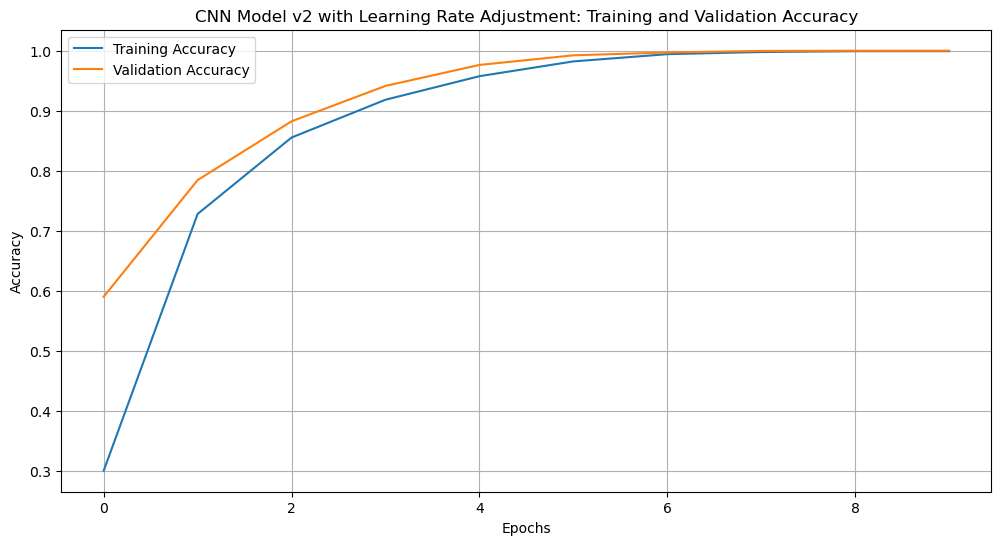

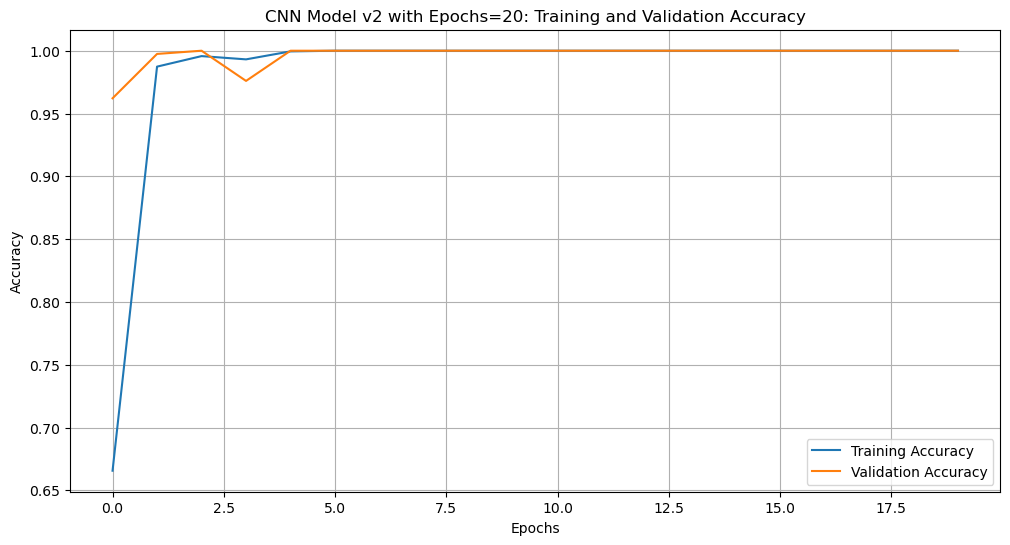

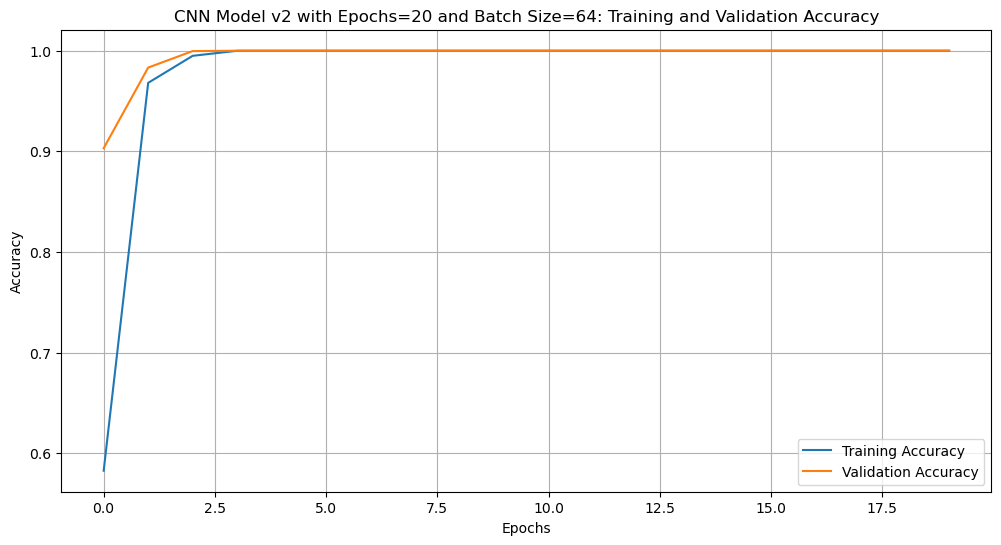

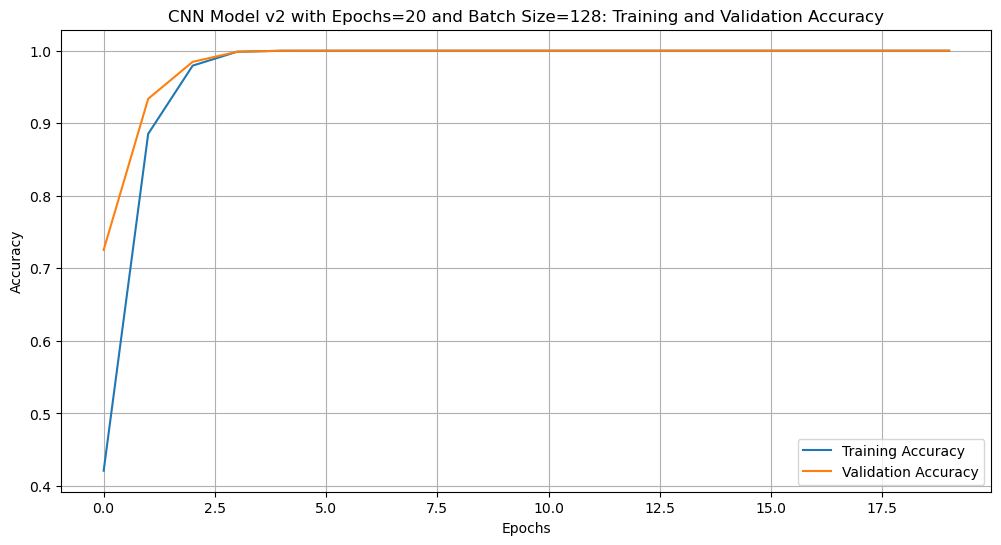

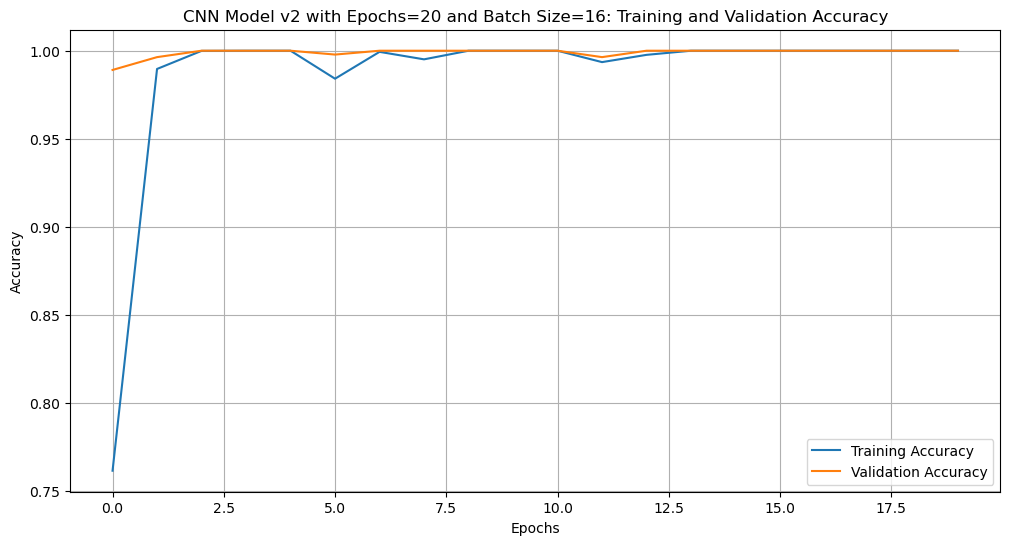

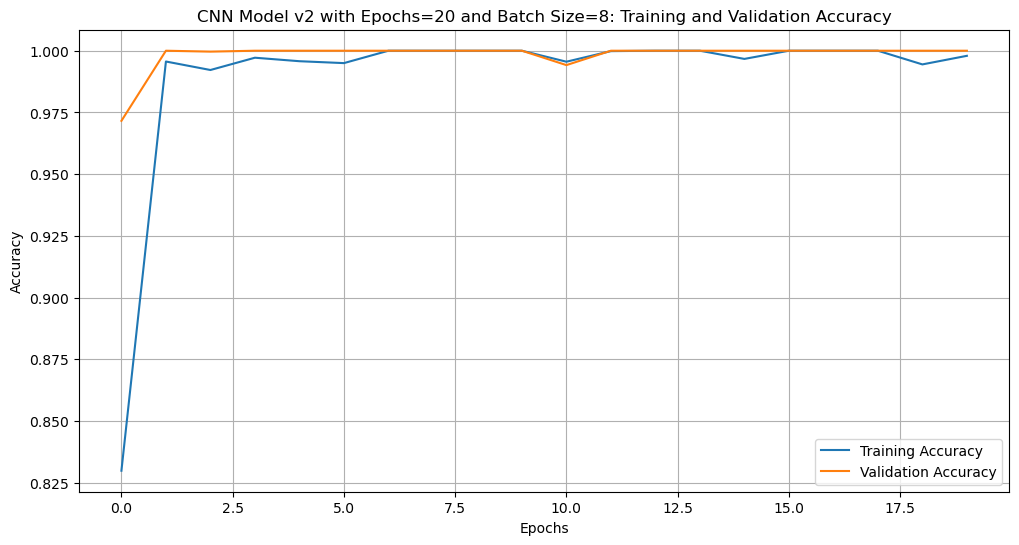

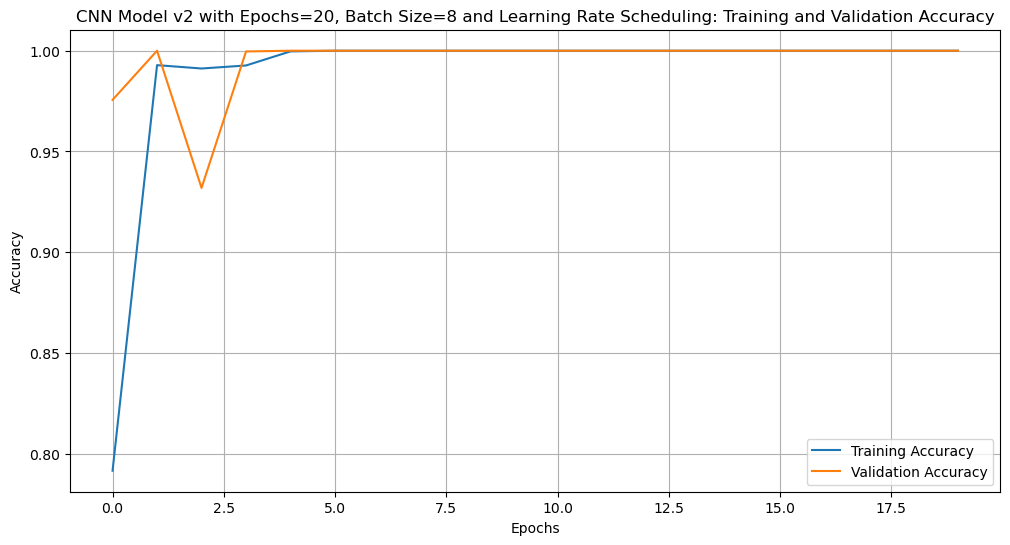

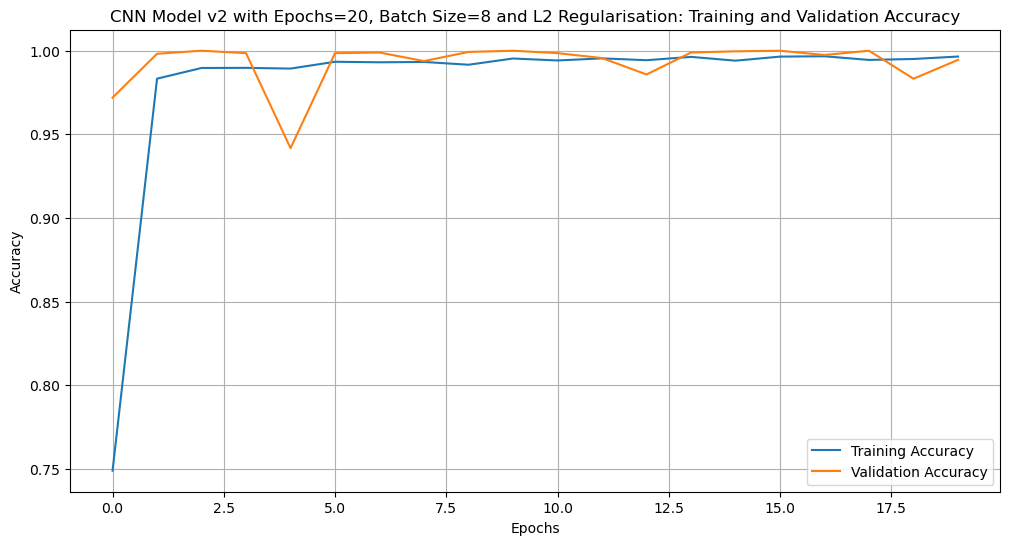

In [22]:
# Ploting learning curves for each tuned version of CNN model v2

# 1. CNN Model v2 Tuned with Learning Rate Adjustment
plot_learning_curves(
    history_cnn_v2_tuned, 
    'CNN Model v2 with Learning Rate Adjustment: Training and Validation Accuracy')

# 2. CNN Model v2 with Epochs Set to 20
plot_learning_curves(
    history_cnn_v2_epoch_20, 
    'CNN Model v2 with Epochs=20: Training and Validation Accuracy')

# 3. CNN Model v2 with Epochs=20 and Batch Size=64
plot_learning_curves(
    history_cnn_v2_batch64, 
    'CNN Model v2 with Epochs=20 and Batch Size=64: Training and Validation Accuracy')

# 4. CNN Model v2 with Epochs=20 and Batch Size=128
plot_learning_curves(
    history_cnn_v2_batch128, 
    'CNN Model v2 with Epochs=20 and Batch Size=128: Training and Validation Accuracy')

# 5. CNN Model v2 with Epochs=20 and Batch Size=16
plot_learning_curves(
    history_cnn_v2_batch16, 
    'CNN Model v2 with Epochs=20 and Batch Size=16: Training and Validation Accuracy')

# 6. CNN Model v2 with Epochs=20 and Batch Size=8
plot_learning_curves(
    history_cnn_v2_batch8, 
    'CNN Model v2 with Epochs=20 and Batch Size=8: Training and Validation Accuracy')

# 7. CNN Model v2 with Learning Rate Scheduling
plot_learning_curves(
    history_cnn_v2_lr, 
    'CNN Model v2 with Epochs=20, Batch Size=8 and Learning Rate Scheduling: Training and Validation Accuracy')

# 8. CNN Model v2 with L2 Regularization
plot_learning_curves(
    history_cnn_v2_l2, 
    'CNN Model v2 with Epochs=20, Batch Size=8 and L2 Regularisation: Training and Validation Accuracy')


##### Comparing the models

In [23]:
# Comparison and selection of the best model
models = [
    ("Baseline Model", 
     baseline_model, test_accuracy),
    ("CNN Model", 
     cnn_model, test_accuracy_cnn),
    ("Baseline Model additional layers", 
     dense_model_v2, test_accuracy_dense_v2),
    ("CNN Model with additional convolutional layers", 
     cnn_model_v2, test_accuracy_cnn_v2), 
    ("CNN Model with additional convolutional layers and adjusted learning rate (0.0001)", 
     cnn_model_v2_tuned, test_accuracy_cnn_v2_tuned),
    ("CNN Model with additional convolutional layers and epoch = 20", 
     cnn_model_v2_epoch_20, test_accuracy_cnn_v2_epoch_20),
    ("CNN Model with additional convolutional layers and epoch = 20, batch size = 64", 
     cnn_model_v2_batch64, test_accuracy_cnn_v2_batch64),
    ("CNN Model with additional convolutional layers and epoch = 20, batch size = 128", 
     cnn_model_v2_batch128, test_accuracy_cnn_v2_batch128),
    ("CNN Model with additional convolutional layers and epoch = 20, batch size = 16", 
     cnn_model_v2_batch16, test_accuracy_cnn_v2_batch16),
    ("CNN Model with additional convolutional layers and epoch = 20, batch size = 8", 
     cnn_model_v2_batch8, test_accuracy_cnn_v2_batch8),
    ("CNN Model with additional convolutional layers and epoch = 20, batch size = 8 with learning rate scheduling", 
     cnn_model_v2l_rate_sch, test_accuracy_cnn_v2_lr),
    ("CNN Model with additional convolutional layers and epoch = 20, batch size = 8 with l2 regularisation", 
     cnn_model_v2_l2, test_accuracy_cnn_v2_l2),
]

for model_name, model, accuracy in models:
    print(f"{model_name}: \nTest Accuracy: {accuracy:.2f}\n")



Baseline Model: 
Test Accuracy: 0.60

CNN Model: 
Test Accuracy: 0.89

Baseline Model additional layers: 
Test Accuracy: 0.69

CNN Model with additional convolutional layers: 
Test Accuracy: 0.93

CNN Model with additional convolutional layers and adjusted learning rate (0.0001): 
Test Accuracy: 0.91

CNN Model with additional convolutional layers and epoch = 20: 
Test Accuracy: 0.94

CNN Model with additional convolutional layers and epoch = 20, batch size = 64: 
Test Accuracy: 0.93

CNN Model with additional convolutional layers and epoch = 20, batch size = 128: 
Test Accuracy: 0.92

CNN Model with additional convolutional layers and epoch = 20, batch size = 16: 
Test Accuracy: 0.94

CNN Model with additional convolutional layers and epoch = 20, batch size = 8: 
Test Accuracy: 0.97

CNN Model with additional convolutional layers and epoch = 20, batch size = 8 with learning rate scheduling: 
Test Accuracy: 0.96

CNN Model with additional convolutional layers and epoch = 20, batch size

##### Note: All the above models maintainded parameter below 500,000.

In [24]:
# Finding the best model based on accuracy
best_model_name, best_model, best_accuracy = max(models, key=lambda item: item[2])

# Output the best model and its accuracy
print(f"The best model is {best_model_name} with a test accuracy of {best_accuracy:.2f}")

# Displaying the summary of the best model
best_model.summary()

The best model is CNN Model with additional convolutional layers and epoch = 20, batch size = 8 with a test accuracy of 0.97


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)

#### 3.2 Reporting Client Information

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Overall Mean Accuracy: 0.97

Accuracy for letter A: 1.00
Accuracy for letter B: 1.00
Accuracy for letter C: 1.00
Accuracy for letter D: 1.00
Accuracy for letter E: 1.00
Accuracy for letter F: 1.00
Accuracy for letter G: 0.89
Accuracy for letter H: 0.95
Accuracy for letter I: 0.99
Accuracy for letter K: 0.99
Accuracy for letter L: 1.00
Accuracy for letter M: 1.00
Accuracy for letter N: 0.89
Accuracy for letter O: 1.00
Accuracy for letter P: 1.00
Accuracy for letter Q: 1.00
Accuracy for letter R: 1.00
Accuracy for letter S: 0.99
Accuracy for letter T: 0.67
Accuracy for letter U: 0.99
Accuracy for letter V: 0.95
Accuracy for letter W: 0.99
Accuracy for letter X: 1.00
Accuracy for letter Y: 0.94

Median Accuracy: 1.00

Best Performing Letter: X

Worst Performing Letters: T, G, N



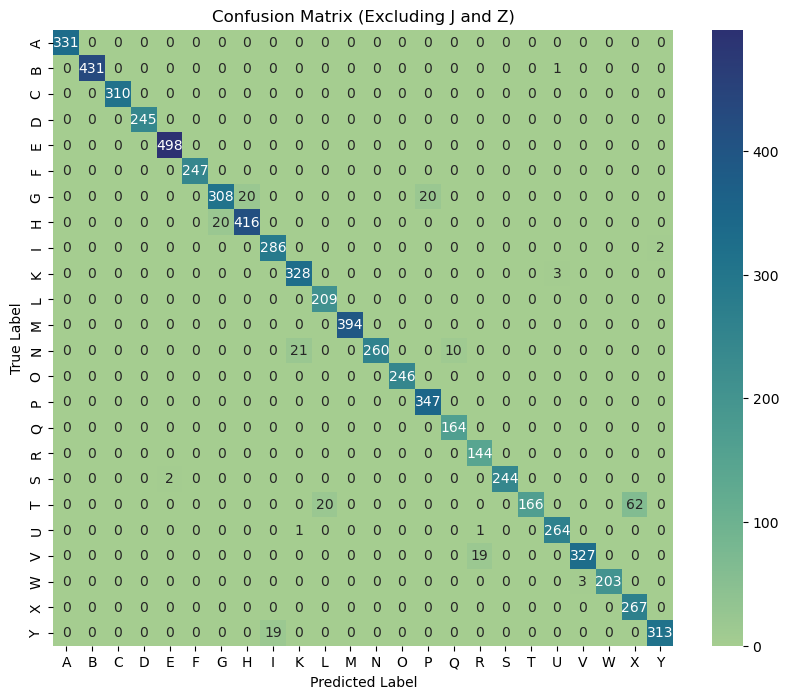


Most common misclassification 1: Letter T misclassified as another letter 82 times

Most common misclassification 2: Letter G misclassified as another letter 40 times

Most common misclassification 3: Letter N misclassified as another letter 31 times



In [29]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

#  Making Predictions on the Test Set
y_pred = best_model.predict(X_test)  # Using the best-performing model
y_pred_classes = np.argmax(y_pred, axis=1)  # Converting predictions to class labels
y_true = np.argmax(y_test, axis=1)  # True labels from the test set

#  Excluding Letters J and Z from Calculations
letters_to_exclude = [9, 25]  # J is index 9, Z is index 25

# Filtering out J and Z
y_true = np.array([y for y in y_true if y not in letters_to_exclude])
y_pred = np.array([y for i, y in enumerate(y_pred_classes) if y_true[i] not in letters_to_exclude])

#  Calculating Overall Mean Accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f'Overall Mean Accuracy: {overall_accuracy:.2f}\n')

# Calculating Per-Letter Accuracy
letter_accuracies = []
labels = [i for i in range(num_classes) if i not in letters_to_exclude]

for i in labels:
    letter_acc = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
    letter_accuracies.append((chr(i + 65), letter_acc))
    print(f'Accuracy for letter {chr(i + 65)}: {letter_acc:.2f}')
print()

# Converting accuracy list to a numpy array for further calculations
letter_accuracies_array = np.array([acc for _, acc in letter_accuracies])

#  Calculating Median Accuracy
median_accuracy = np.median(letter_accuracies_array)
print(f'Median Accuracy: {median_accuracy:.2f}\n')

#  Identifying Best and Worst Performing Letters
letter_accuracies_sorted = sorted(letter_accuracies, key=lambda x: x[1])
best_letter = letter_accuracies_sorted[-1][0]  # Highest accuracy letter
worst_letter_1 = letter_accuracies_sorted[0][0]  # Lowest accuracy letter
worst_letter_2 = letter_accuracies_sorted[1][0]  # Second lowest accuracy letter
worst_letter_3 = letter_accuracies_sorted[2][0]  # Third lowest accuracy letter
print(f'Best Performing Letter: {best_letter}\n')
print(f'Worst Performing Letters: {worst_letter_1}, {worst_letter_2}, {worst_letter_3}\n')

# Confusion Matrix to Identify Common Errors
conf_matrix = confusion_matrix(y_true, y_pred)

# Ploting the Confusion Matrix in a Colorful Manner
def plot_confusion_matrix(conf_matrix, class_labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='crest', cbar=True, 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

class_labels = [chr(i + 65) for i in range(num_classes) if i not in letters_to_exclude]
plot_confusion_matrix(conf_matrix, class_labels, title='Confusion Matrix (Excluding J and Z)')
print()

#  Identifying the Three Most Common Misclassifications
errors = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)  # Calculating errors for each letter
sorted_errors = np.argsort(errors)[::-1]  # Sorting errors in descending order
for i in range(3):
    print(f'Most common misclassification {i+1}: Letter {chr(labels[sorted_errors[i]] + 65)}'
          f' misclassified as another letter {errors[sorted_errors[i]]} times\n')


#### 3.3 Short Written Recommendation

In [30]:
# Generating dynamic Markdown summary
summary = f"""
## Model Performance Summary

Based on the current model performance, the median accuracy goal can most likely be met as the model's 
median accuracy (**{median_accuracy:.0%}**) exceeded the required median accuracy of **94%**. 
The individual letter accuracy can also be met with the current model except for the letter 
**{worst_letter_1}** which showed only **{letter_accuracies_sorted[0][1]:.0%}** accuracy. 
This leaves room for improvement as this was the most commonly misclassified letter. 
Further optimization, such as targeted data augmentation or fine-tuning layers, could potentially 
increase the accuracy of the individual letters.
"""

# Displaying the summary
display(Markdown(summary))


## Model Performance Summary

Based on the current model performance, the median accuracy goal can most likely be met as the model's 
median accuracy (**100%**) exceeded the required median accuracy of **94%**. 
The individual letter accuracy can also be met with the current model except for the letter 
**T** which showed only **67%** accuracy. 
This leaves room for improvement as this was the most commonly misclassified letter. 
Further optimization, such as targeted data augmentation or fine-tuning layers, could potentially 
increase the accuracy of the individual letters.
